## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy as sp


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata,study_results,how="left",on="Mouse ID")
#displaying the data after combining
combined_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
#listing the objects and treatments
mice = combined_data["Mouse ID"].unique()
drugs = combined_data["Drug Regimen"].unique()
time = combined_data["Timepoint"].unique()

# counts of subjects and treatments
num_mouse = len(mice)
num_drugs = len(drugs)
num_measurements = len(time)
num_samples = num_drugs * num_measurements

# summarise in a dataframe
data_summary = pd.DataFrame({"Number of Mice": [num_mouse],
                         "Number of Drug Regimen Treatments": [num_drugs],
                         "Number of Time Measurements": [num_measurements],
                         "Number of Samples": [num_samples]})
data_summary

,Number of Mice,Number of Drug Regimen Treatments,Number of Time Measurements,Number of Samples
0,249,10,10,100


## Summary statistics

In [6]:
# Generate a summary statistics table of mean,
#median, variance, standard deviation,
#and SEM of the tumor volume for each regimen

#tv=tumor volume
mean_tv = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2))
mean_tv  =mean_tv .rename(columns={"Tumor Volume (mm3)":"Mean"})
mean_tv.head()


,Mean
Drug Regimen,
Capomulin,40.68
Ceftamin,52.59
Infubinol,52.88
Ketapril,55.24
Naftisol,54.33


In [7]:
median_tv = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2))
median_tv =median_tv.rename(columns={"Tumor Volume (mm3)":"Median"})
median_tv.head()

,Median
Drug Regimen,
Capomulin,41.56
Ceftamin,51.78
Infubinol,51.82
Ketapril,53.70
Naftisol,52.51


In [8]:
sem_tv= pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2))
sem_tv =sem_tv.rename(columns={"Tumor Volume (mm3)":"SEM"})
sem_tv.head()

,SEM
Drug Regimen,
Capomulin,0.33
Ceftamin,0.47
Infubinol,0.49
Ketapril,0.60
Naftisol,0.60


In [9]:
variance_tv = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2))
variance_tv =variance_tv.rename(columns={"Tumor Volume (mm3)":"Variance"})
variance_tv.head()


,Variance
Drug Regimen,
Capomulin,24.95
Ceftamin,39.29
Infubinol,43.13
Ketapril,68.55
Naftisol,66.17


In [10]:
std_tv = pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2))
std_tv = std_tv.rename(columns={"Tumor Volume (mm3)":"Std"})
std_tv .head()

,Std
Drug Regimen,
Capomulin,4.99
Ceftamin,6.27
Infubinol,6.57
Ketapril,8.28
Naftisol,8.13


In [11]:
summary_stat=[mean_tv,median_tv ,sem_tv,variance_tv,std_tv]
stat_result= pd.concat(summary_stat,axis=1,join='inner')
stat_result

,Mean,Median,SEM,Variance,Std
Drug Regimen,,,,,
Capomulin,40.68,41.56,0.33,24.95,4.99
Ceftamin,52.59,51.78,0.47,39.29,6.27
Infubinol,52.88,51.82,0.49,43.13,6.57
Ketapril,55.24,53.70,0.60,68.55,8.28
Naftisol,54.33,52.51,0.60,66.17,8.13
Placebo,54.03,52.29,0.58,61.17,7.82
Propriva,52.32,50.85,0.51,42.35,6.51
Ramicane,40.22,40.67,0.32,23.49,4.85
Stelasyn,54.23,52.43,0.57,59.45,7.71


In [12]:
stat_analysis= pd.DataFrame(round(combined_data.groupby(['Drug Regimen']).describe()['Tumor Volume (mm3)'],2))

stat_analysis

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,161.0,52.32,6.51,45.00,47.08,50.85,56.18,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar plots

Text(0, 0.5, 'Tumor Volume (mm3)')

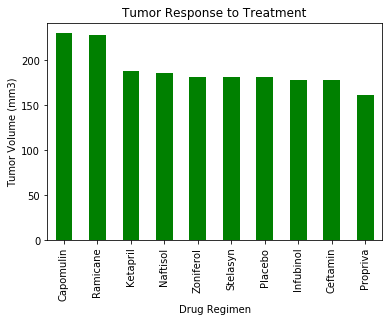

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
treatment_reg= combined_data["Drug Regimen"].value_counts()
datapoint = treatment_reg
treatment_regiment_bar=datapoint.plot(kind="bar", facecolor="green")


plt.title('Tumor Response to Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')


In [14]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(combined_data))
tick_locations = [value for value in x_axis]

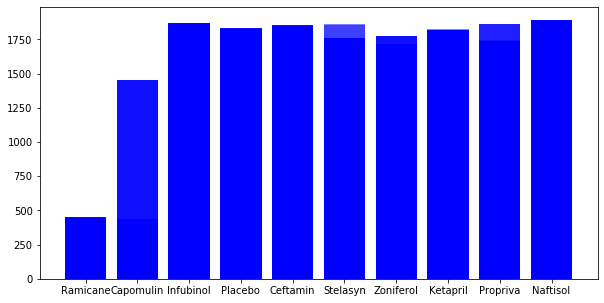

In [15]:
plt.figure(figsize=(10,5))
plt.bar(combined_data["Drug Regimen"],x_axis, color='b', alpha=0.5, align="center")
plt.show()

## Pie plots

In [16]:
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
data_sex = pd.DataFrame(combined_data["Sex"].value_counts())
data_sex

,Sex
Male,958
Female,935


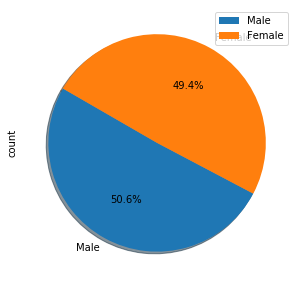

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df = pd.DataFrame({'count':[958, 935]},
                   index = ['Male', 'Female'])
plot = df.plot.pie(y='count', figsize=(5, 5),autopct="%1.1f%%", shadow=True, startangle=150)


C:\Users\dshakoory\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


([<matplotlib.patches.Wedge at 0x2b3987a19e8>,
 [Text(-0.6767342830882631, -1.2255736249173341, 'Male'),
  Text(0.531719793855064, 0.9629507052921912, 'Female')],
 [Text(-0.4350434676995977, -0.787868758875429, '50.6%'),
  Text(0.2900289784663985, 0.525245839250286, '49.4%')])

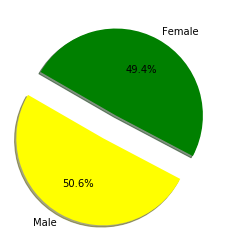

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data_sex = pd.DataFrame(combined_data["Sex"].value_counts())
labels = ["Male", "Female"]
colors = ["yellow","green"]
explode = (0.3,0)
plt.pie(data_sex, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)


## Quartiles, outliers and boxplots

In [20]:
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
tumor_vol= combined_data.groupby(["Mouse ID", "Drug Regimen"])

#group data by drug and timepoint 
#grouped_df = combined_data.groupby(["Drug Regimen", "Timepoint"])

subset_df = tumor_vol[["Tumor Volume (mm3)"]].count()

subset_df.head()
#find avg tumor volume and metastic sites for each drug at each timepoint

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
a203,Infubinol,10
a251,Infubinol,10
a262,Placebo,10
a275,Ceftamin,10
a366,Stelasyn,7


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin



time_point=combined_data["Timepoint"]
tumor_volume=combined_data["Tumor Volume (mm3)"]
world_avg, = plt.plot(time_point, tumor_volume, color="blue", label="World Average" )

In [ ]:
combined_data = combined_data.groupby(["Drug Regimen"])
combined_data.head()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen